<a href="https://colab.research.google.com/github/mehulgadodia/AI-demo-jarvis/blob/main/mainfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**RNN/LSTM to classify the sentiment as Hate/ Non-hate speech**

#**Importing Necessary libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Preparing the data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:

df = pd.read_csv('/content/drive/MyDrive/DNN_1/data8.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [12]:
classes = ['Hate Speech','Offensive Language','None']

In [13]:
df.drop(['count','hate_speech','offensive_language','neither','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [14]:
df.shape

(24783, 2)

#**Statistics of the Data**

Hate Speech  :  1430
Offensive Language  :  19190
None  :  4163


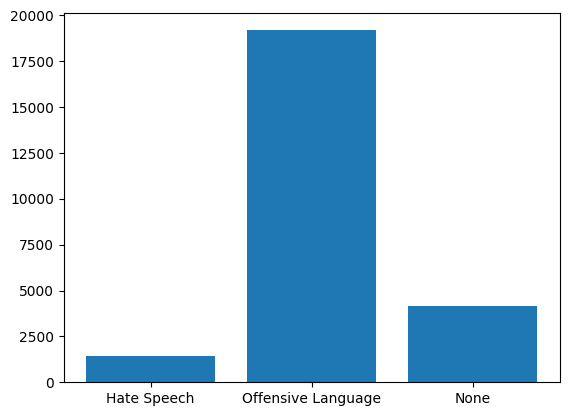

In [15]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [16]:
hate_tweets = df[df['class']==0]
offensive_tweets = df[df['class']==1]
neither = df[df['class']==2]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(1430, 2)
(19190, 2)
(4163, 2)


In [17]:
for i in range(3):
    hate_tweets = pd.concat([hate_tweets,hate_tweets],ignore_index = True)
neither = pd.concat([neither,neither,neither], ignore_index = True)
offensive_tweets = offensive_tweets.iloc[0:12000,:]
print(hate_tweets.shape)
print(offensive_tweets.shape)
print(neither.shape)

(11440, 2)
(12000, 2)
(12489, 2)


In [18]:
df = pd.concat([hate_tweets,offensive_tweets,neither],ignore_index = True)
df.shape

(35929, 2)

Hate Speech  :  11440
Offensive Language  :  12000
None  :  12489


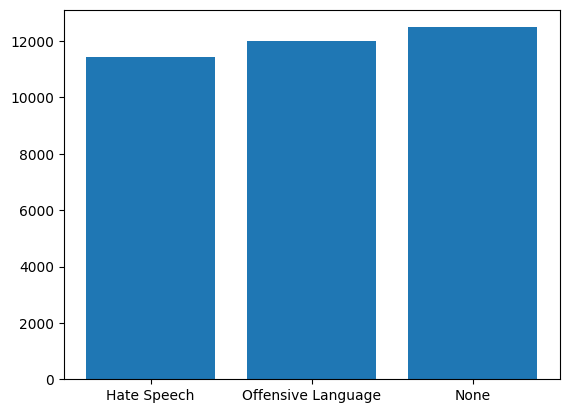

In [19]:
labels = df['class']
unique, counts = np.unique(labels, return_counts=True)
values = list(zip(unique, counts))
plt.bar(classes,counts)
for i in values:
    print(classes[i[0]],' : ',i[1])
plt.show()

In [20]:
df.head()

,class,tweet
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."


#**Preprocessing**

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# dealing with Slangs
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food', 'u': 'you',
     'ur':'your', 'bday' : 'birthday', 'bihday' : 'birthday'}

In [21]:
stop_words = set(stopwords.words("english"))
stop_words.add('rt')
stop_words.remove('not')
lemmatizer = WordNetLemmatizer()
giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
mention_regex = '@[\w\-]+'

def clean_text(text):
    text = re.sub('"', "", text)
    text = re.sub(mention_regex, ' ',text) #removing all user names
    text = re.sub(giant_url_regex, ' ', text)  #remocing the urls
    text = text.lower()
    text = re.sub("hm+", "", text) #removing variants of hmmm
    text = re.sub("[^a-z]+", " ", text) #removing all numbers, special chars like @,#,? etc
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = [d[word] if word in d else word for word in text]  #replacing some slangs
    text = [lemmatizer.lemmatize(token) for token in text]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = " ".join(text)
    return text

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\('
<>:6: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-1637501056.py:5: SyntaxWarning: invalid escape sequence '\('
  giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
/tmp/ipython-input-1637501056.py:6: SyntaxWarning: invalid escape sequence '\w'
  mention_regex = '@[\w\-]+'


In [22]:
df['processed_tweets'] = df.tweet.apply(lambda x: clean_text(x))   # df.review.map(clean_text) Also can be used
df.head()

,class,tweet,processed_tweets
0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",queer gaywad
1,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",alsarabsss he beaner smh tell he mexican
2,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",fuck gay blacklist hoe hold tehgodclan anyway
3,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",lmfaoooo hate black people black people nigger
4,0,"""@NoChillPaz: ""At least I'm not a nigger"" http...",least not nigger lmfao


In [23]:
x = df.processed_tweets
y = df['class']
print(x.shape)
print(y.shape)

(35929,)
(35929,)


In [24]:
# finding unique words
word_unique = []
for i in x:
    for j in i.split():
        word_unique.append(j)
unique, counts = np.unique(word_unique, return_counts=True)
print("The total words in the tweets are : ", len(word_unique))
print("The total UNIQUE words in the tweets are : ", len(unique))

The total words in the tweets are :  275540
The total UNIQUE words in the tweets are :  14162


In [25]:
# finding length of tweets
tweets_length = []
for i in x:
    tweets_length.append(len(i.split()))
print("The Average Length tweets are : ",np.mean(tweets_length))
print("The max length of tweets is : ", np.max(tweets_length))
print("The min length of tweets is : ", np.min(tweets_length))

The Average Length tweets are :  7.669013888502324
The max length of tweets is :  28
The min length of tweets is :  0


In [ ]:
tweets_length = pd.DataFrame(tweets_length)
# tweets_length.describe()

In [26]:
#Sorting the Unique words based on their Frequency
col = list(zip(unique, counts))
col = sorted(col, key = lambda x: x[1],reverse=True)
col=pd.DataFrame(col)
print("Top 20 Occuring Words with their frequency are:")
col.iloc[:20,:]

Top 20 Occuring Words with their frequency are:


,0,1
0,bitch,9065
1,like,3817
2,get,3636
3,hoe,3426
4,trash,3217
5,fuck,3102
6,nigga,2811
7,faggot,2239
8,as,2073
9,you,1851


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(max_features = 8000 )
# tokenize and build vocab

vectorizer.fit(x)
# summarize

print(len(vectorizer.vocabulary_))
print(vectorizer.idf_.shape)

8000
(8000,)


In [31]:
x_tfidf = vectorizer.transform(x).toarray()
print(x_tfidf.shape)

(35929, 8000)


In [32]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [33]:
num_words = 8000
embed_dim = 32
tokenizer = Tokenizer(num_words=num_words,oov_token = "<oov>" )
tokenizer.fit_on_texts(x)
word_index=tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)
length=[]
for i in sequences:
    length.append(len(i))
print(len(length))
print("Mean is: ",np.mean(length))
print("Max is: ",np.max(length))
print("Min is: ",np.min(length))

35929
Mean is:  7.669013888502324
Max is:  28
Min is:  0


In [34]:
pad_length = 24
sequences = pad_sequences(sequences, maxlen = pad_length, truncating = 'pre', padding = 'post')
sequences.shape

(35929, 24)

#**Splitting the Data**

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(sequences,y,test_size = 0.05)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(34132, 24)
(1797, 24)
(34132,)
(1797,)


#**RNN Model**

In [36]:
from keras.layers import Dense, Embedding, Dropout , Activation, Flatten, SimpleRNN
from keras.layers import GlobalMaxPool1D
from keras.models import Model, Sequential
import tensorflow as tf

In [37]:
recall = tf.keras.metrics.Recall()
precision = tf.keras.metrics.Precision()

model = Sequential([Embedding(num_words, embed_dim, input_length = pad_length),
                   SimpleRNN(8, return_sequences = True),
                   GlobalMaxPool1D(),
                   Dense(20,activation = 'relu',kernel_initializer='he_uniform'),
                   Dropout(0.25),
                   Dense(3,activation = 'softmax')])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.name = 'Twitter Hate Text Classification'
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#**Training the Model**

In [38]:
history = model.fit(x = x_train, y = y_train, epochs = 5,validation_split = 0.06)

Epoch 1/5
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6318 - loss: 0.7717 - val_accuracy: 0.9116 - val_loss: 0.2516
Epoch 2/5
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9276 - loss: 0.2329 - val_accuracy: 0.9365 - val_loss: 0.1840
Epoch 3/5
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9539 - loss: 0.1504 - val_accuracy: 0.9434 - val_loss: 0.1541
Epoch 4/5
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9675 - loss: 0.1088 - val_accuracy: 0.9526 - val_loss: 0.1498
Epoch 5/5
1003/1003 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9772 - loss: 0.0800 - val_accuracy: 0.9546 - val_loss: 0.1423


#**Evaluation**

In [39]:
evaluate = model.evaluate(x_test,y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9656 - loss: 0.1219


In [40]:
print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))

Test Acuracy is : 96.10 %
Test Loss is : 0.1293


In [41]:
predictions = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [42]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

# **Confusion Matrix**

In [43]:
from sklearn import metrics
cm = metrics.confusion_matrix(predict,y_test)
acc = metrics.accuracy_score(predict,y_test)

In [44]:
print("The Confusion matrix is: \n",cm)

The Confusion matrix is: 
 [[550  22   1]
 [ 20 581   7]
 [  2  18 596]]


#**Accuracy**

In [45]:
print(acc*100)

96.10461880912632


#**Classification Report**

In [46]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       572
           1       0.96      0.94      0.95       621
           2       0.97      0.99      0.98       604

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797



#**LSTM**

In [47]:
from tensorflow.keras.layers import Embedding, LSTM, Dense
# ARCHITECTURE
EMBED_DIM = 32
LSTM_OUT = 64

model = Sequential()
model.add(Embedding(num_words, EMBED_DIM, input_length = pad_length))
model.add(LSTM(LSTM_OUT))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


#**Training Model**

In [48]:
history = model.fit(x = x_train, y = y_train, epochs = 10,validation_split = 0.10)

Epoch 1/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7218 - loss: 0.5958 - val_accuracy: 0.9265 - val_loss: 0.2323
Epoch 2/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.9376 - loss: 0.1918 - val_accuracy: 0.9300 - val_loss: 0.2236
Epoch 3/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9545 - loss: 0.1447 - val_accuracy: 0.9265 - val_loss: 0.2196
Epoch 4/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9655 - loss: 0.1091 - val_accuracy: 0.9379 - val_loss: 0.2062
Epoch 5/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9694 - loss: 0.0983 - val_accuracy: 0.9426 - val_loss: 0.2068
Epoch 6/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9749 - loss: 0.0801 - val_accuracy: 0.9361 - val_loss: 0.2094
Epoch 7/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9762 - loss: 0.0758 - val_accuracy: 0.9435 - val_loss: 0.2072
Epoch 8/10
960/960 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9811 - loss: 0.0636 - val_accuracy

#**Evaluation**

In [49]:
evaluate = model.evaluate(x_test,y_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9413 - loss: 0.2088


In [50]:
print("Test Acuracy is : {:.2f} %".format(evaluate[1]*100))
print("Test Loss is : {:.4f}".format(evaluate[0]))

Test Acuracy is : 94.10 %
Test Loss is : 0.2238


In [51]:
predictions = model.predict(x_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [52]:
predict = []
for i in predictions:
    predict.append(np.argmax(i))

#**Confusion Matrix**

In [53]:
from sklearn import metrics
cm = metrics.confusion_matrix(predict,y_test)
acc = metrics.accuracy_score(predict,y_test)

In [54]:
print("The Confusion matrix is: \n",cm)

The Confusion matrix is: 
 [[568  65   6]
 [  3 529   4]
 [  1  27 594]]


#**Accuracy**

In [55]:
print(acc*100)

94.10127991096272


#**Classification Report**

In [56]:
from sklearn import metrics
print(metrics.classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       572
           1       0.99      0.85      0.91       621
           2       0.95      0.98      0.97       604

    accuracy                           0.94      1797
   macro avg       0.94      0.94      0.94      1797
weighted avg       0.94      0.94      0.94      1797

